<a href="https://www.kaggle.com/code/adeylol/eu-countries-gdp-time-series-analysis-prediction?scriptVersionId=219332686" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Time-Series Analysis & Forecasting with GDP Data (Europe)

## 1. **Data Preparation**
   - We began by loading and preparing the GDP data for 15+ European countries spanning from 1960 to 2023.
   - The data was cleaned, with missing values handled and adjusted for time series forecasting.
   - We visualized the GDP trends for multiple countries using line plots.

## 2. **Exploratory Data Analysis (EDA)**
   - We performed basic exploratory analysis on the GDP data by visualizing trends, distributions, and correlations.

## 3. **Modeling and Forecasting**
### **Model 1: ARIMA (Autoregressive Integrated Moving Average)**
   - We first implemented the ARIMA model to forecast GDP for `Germany` using the `SARIMAX` implementation.
   - The model provided forecasts, and we calculated RMSE (Root Mean Squared Error) for performance evaluation.

### **Model 2: Exponential Smoothing**
   - Exponential Smoothing was used for modeling data with a trend and seasonality component.
   - This method is suitable when the data exhibits simple patterns without the need for complex models.
   - We evaluated the model's fit and compared it with the ARIMA model in terms of forecasting accuracy.

### **Model 3: Prophet**
   - Prophet was implemented to capture both trend and seasonality, as well as the ability to handle external events and holidays.
   - This model is known for its robustness and ease of use for forecasting time-series data, particularly with irregular patterns.

### **Model 4: Random Forest**
   - We utilized the Random Forest model, which is a flexible machine learning technique that handles non-linear patterns in data well.
   - Random Forest can model more complex relationships compared to traditional time-series methods.

### **Model 5: LSTM (Long Short-Term Memory)**
   - We explored deep learning by using LSTM, a type of Recurrent Neural Network (RNN), ideal for sequential data.
   - Steps included:
     - **Data Scaling**: The GDP data was normalized using MinMaxScaler.
     - **Data Preparation**: We created training and test datasets with a time step of 5 years.
     - **LSTM Model**: The LSTM model was built using two LSTM layers, followed by a Dense layer for forecasting.
     - **Model Training**: The model was trained over 50 epochs.
     - **Forecasting & Evaluation**: We forecasted future GDP values and evaluated the model using RMSE.

## 4. **Plotting and Results**
   - We plotted the actual vs. predicted values for the LSTM model and compared the forecasts generated by all models (ARIMA, Exponential Smoothing, Prophet, Random Forest, and LSTM).
   - RMSE and other evaluation metrics were used to assess the performance of each model.

## 5. **Alternative Models (Future Steps)**
   - We considered other models and enhancements for time-series forecasting, including:
     - **Hyperparameter tuning** for the LSTM and Random Forest models.
     - **Feature engineering** to incorporate external factors such as economic indicators.
     - Exploring models like **XGBoost** and **Support Vector Machines** for better performance.

## Conclusion:
   - We explored multiple forecasting techniques including **ARIMA**, **Exponential Smoothing**, **Prophet**, **Random Forest**, and **LSTM**.
   - Each model offered unique strengths:
     - **ARIMA** for time-series with linear trends.
     - **Exponential Smoothing** for simple trends and seasonality.
     - **Prophet** for complex seasonality and external factors.
     - **Random Forest** for handling non-linear relationships.
     - **LSTM** for deep learning on sequential data.
   - The models were compared based on performance (RMSE) and their suitability for predicting GDP growth.
   - Further improvements can include fine-tuning model parameters, exploring more advanced models, and incorporating external economic indicators.



In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("/kaggle/input/gdp-growth-of-european-countries/Europe_GDP.csv")

In [3]:
data.head()

,Year,Austria,Belgium,Denmark,Finland,France,Germany,Greece,Iceland,Ireland,Italy,Luxembourg,Netherlands,Norway,Portugal,Spain,Sweden,Switzerland,United Kingdom
0,1960,6.650134e+09,1.181062e+10,6.361166e+09,5.279011e+09,6.222548e+10,8.431095e+10,4.335192e+09,252169712.0,1.998550e+09,4.191581e+10,709941874.0,1.326346e+10,5.197399e+09,3.339150e+09,1.243339e+10,1.595320e+10,1.041223e+10,7.323397e+10
1,1961,7.375455e+09,1.256170e+10,7.058361e+09,5.983900e+09,6.746164e+10,9.620573e+10,4.961399e+09,257703244.6,2.151773e+09,4.654222e+10,710163719.4,1.457838e+10,5.669689e+09,3.573719e+09,1.424830e+10,1.735478e+10,1.171335e+10,7.774197e+10
2,1962,7.823687e+09,1.343683e+10,7.953274e+09,6.407225e+09,7.560753e+10,1.055090e+11,5.213043e+09,289200704.4,2.329373e+09,5.229335e+10,747846862.2,1.582429e+10,6.107077e+09,3.835884e+09,1.662150e+10,1.882135e+10,1.298965e+10,8.124756e+10
3,1963,8.447137e+09,1.444581e+10,8.466045e+09,6.958296e+09,8.475920e+10,1.118230e+11,5.895281e+09,345175036.1,2.505073e+09,5.989787e+10,797902154.2,1.716848e+10,6.553270e+09,4.084252e+09,1.964575e+10,2.037167e+10,1.428387e+10,8.656196e+10
4,1964,9.249879e+09,1.616804e+10,9.677401e+09,7.848288e+09,9.400785e+10,1.228800e+11,6.669670e+09,440797869.3,2.851092e+09,6.556965e+10,910877686.3,2.020232e+10,7.206522e+09,4.429203e+09,2.198258e+10,2.271843e+10,1.583313e+10,9.440756e+10


In [4]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

In [5]:
# Set the 'Year' as the index
data.set_index('Year', inplace=True)
print(data.head())

           Austria       Belgium       Denmark       Finland        France  \
Year                                                                         
1960  6.650134e+09  1.181062e+10  6.361166e+09  5.279011e+09  6.222548e+10   
1961  7.375455e+09  1.256170e+10  7.058361e+09  5.983900e+09  6.746164e+10   
1962  7.823687e+09  1.343683e+10  7.953274e+09  6.407225e+09  7.560753e+10   
1963  8.447137e+09  1.444581e+10  8.466045e+09  6.958296e+09  8.475920e+10   
1964  9.249879e+09  1.616804e+10  9.677401e+09  7.848288e+09  9.400785e+10   

           Germany        Greece      Iceland       Ireland         Italy  \
Year                                                                        
1960  8.431095e+10  4.335192e+09  252169712.0  1.998550e+09  4.191581e+10   
1961  9.620573e+10  4.961399e+09  257703244.6  2.151773e+09  4.654222e+10   
1962  1.055090e+11  5.213043e+09  289200704.4  2.329373e+09  5.229335e+10   
1963  1.118230e+11  5.895281e+09  345175036.1  2.505073e+09  5.98978

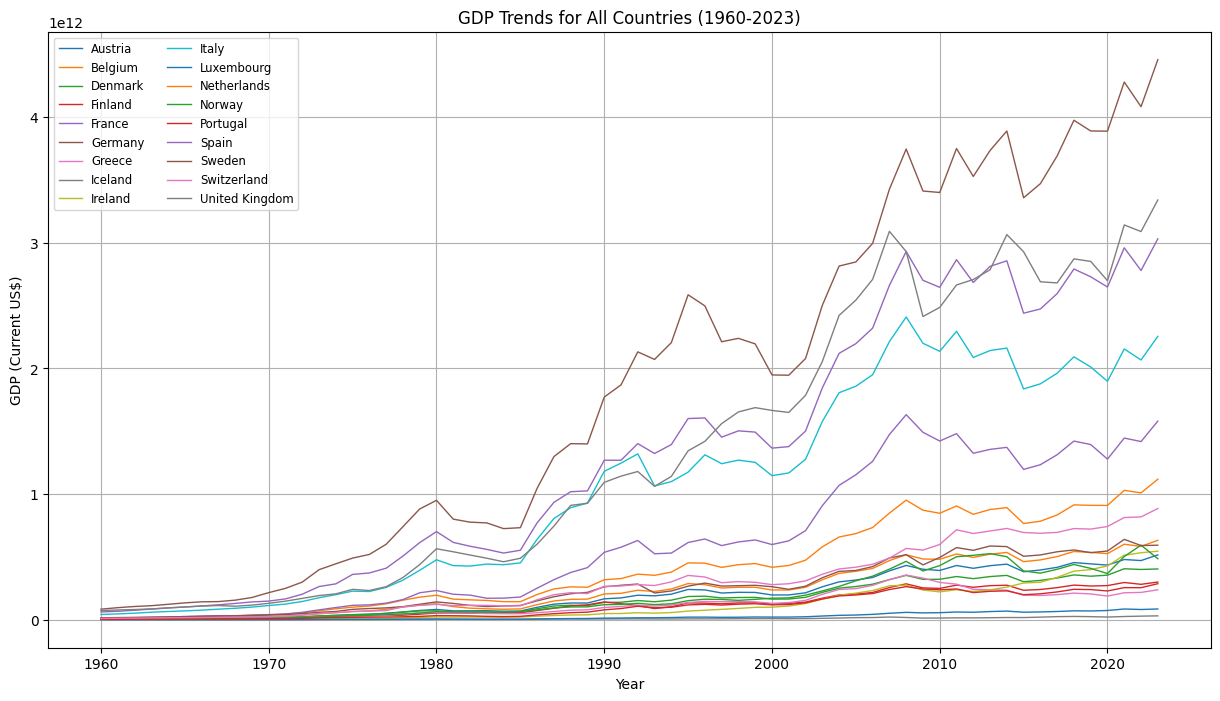

In [6]:
# Line chart for GDP Trends
# Iterate through each country in the dataset
# Plot all countries on a single chart
data.plot(figsize=(15, 8), lw=1, title="GDP Trends for All Countries (1960-2023)")
plt.xlabel('Year')
plt.ylabel('GDP (Current US$)')
plt.legend(loc='upper left', ncol=2, fontsize='small')  # Adjust legend for readability
plt.grid()
plt.show()



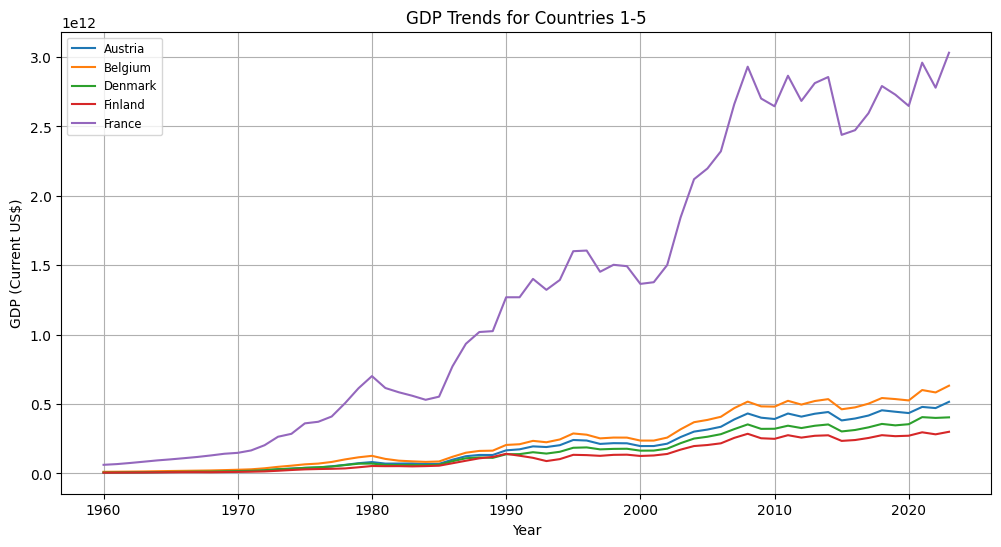

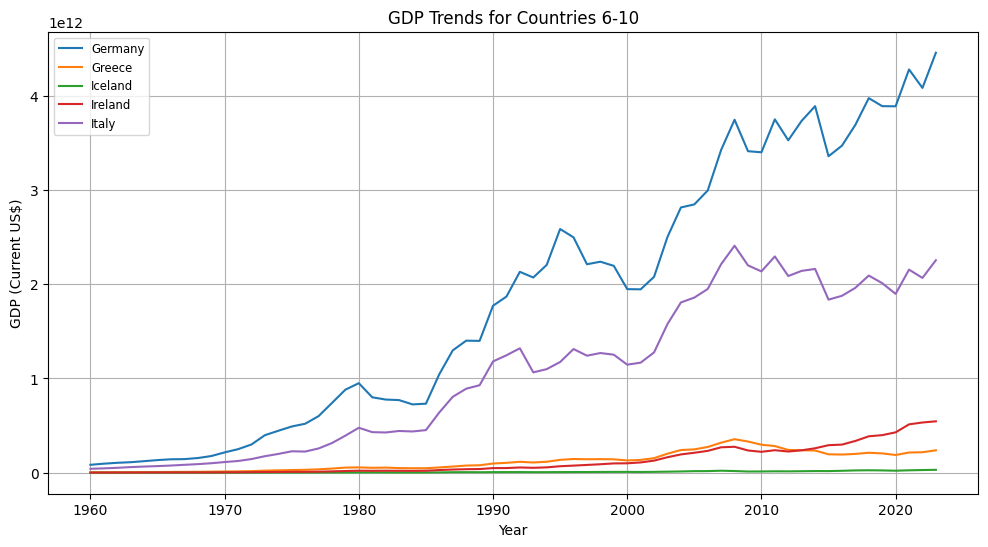

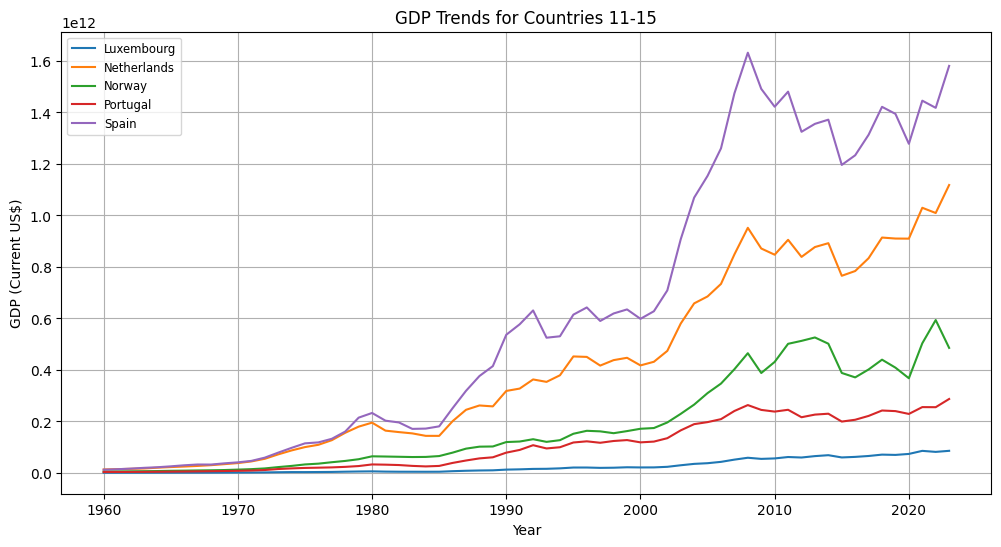

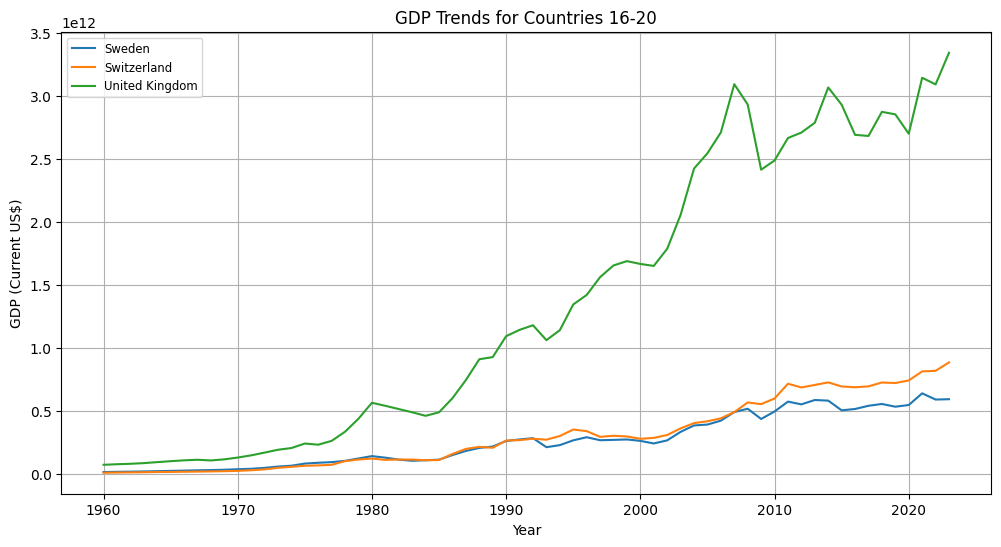

In [7]:
# Batch plotting for subsets of countries for readabilty
batch_size = 5
countries = data.columns.tolist()
for i in range(0, len(countries), batch_size):
    subset = countries[i:i + batch_size]
    data[subset].plot(figsize=(12, 6), lw=1.5, title=f"GDP Trends for Countries {i+1}-{i+batch_size}")
    plt.xlabel('Year')
    plt.ylabel('GDP (Current US$)')
    plt.legend(loc='upper left', fontsize='small')
    plt.grid()
    plt.show()


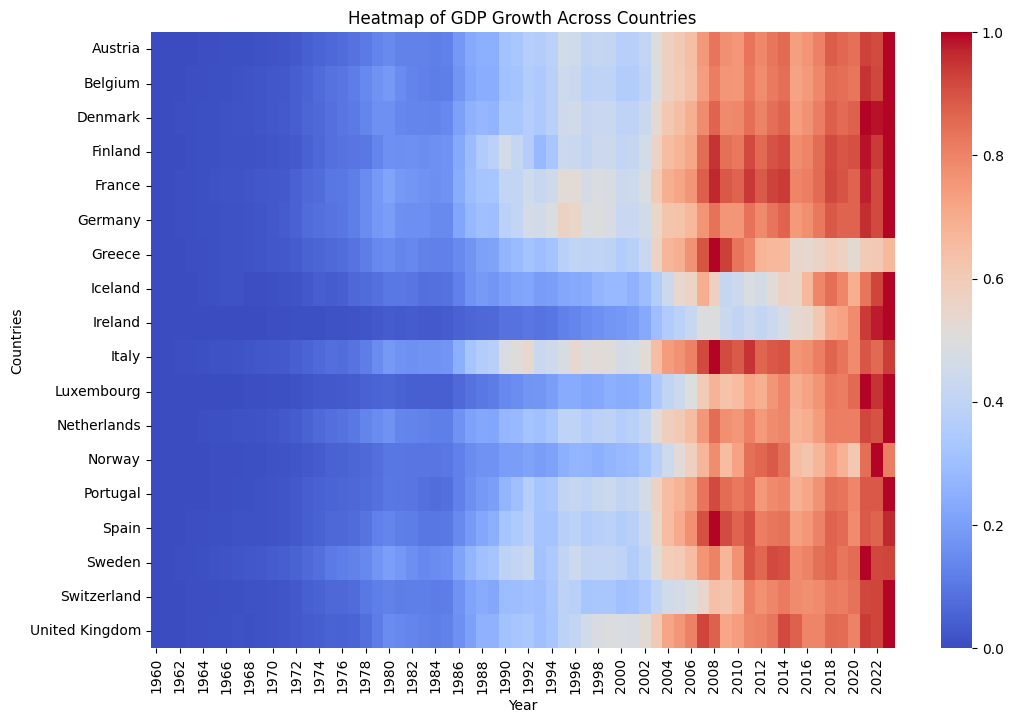

In [8]:
# Normalize data for heatmap
normalized_data = (data - data.min()) / (data.max() - data.min())

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(normalized_data.T, cmap="coolwarm", cbar=True)
plt.title("Heatmap of GDP Growth Across Countries")
plt.xlabel("Year")
plt.ylabel("Countries")
plt.show()


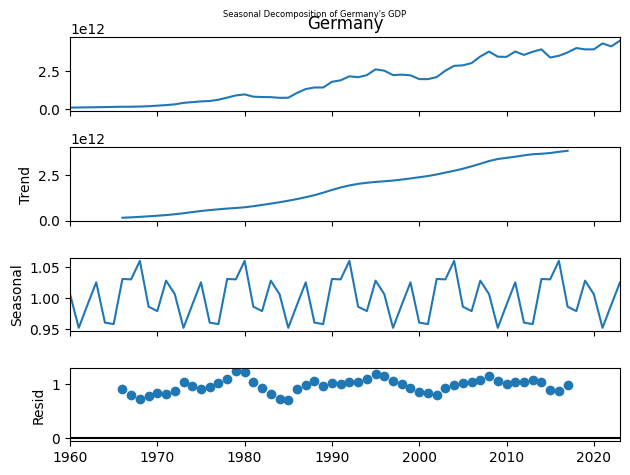

In [9]:
# Decompose the GDP time series for a single country
country = 'Germany'
decomposition = seasonal_decompose(data[country], model='multiplicative', period=12)

# Plot decomposition
decomposition.plot()
plt.suptitle(f"Seasonal Decomposition of {country}'s GDP", fontsize=6)
plt.show()


In [10]:
# Perform ADF Test for stationarity
result = adfuller(data['Germany'])
print(f"ADF Statistic: {result[0]}")
print(f"p-value: {result[1]}")
if result[1] <= 0.05:
    print("The series is stationary.")
else:
    print("The series is not stationary.")


ADF Statistic: 1.070915770344515
p-value: 0.994960594724233
The series is not stationary.


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                Germany   No. Observations:                   51
Model:                 ARIMA(2, 1, 2)   Log Likelihood               -1360.451
Date:                Sun, 26 Jan 2025   AIC                           2730.903
Time:                        13:10:07   BIC                           2740.463
Sample:                             0   HQIC                          2734.543
                                 - 51                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.8247      0.502      1.642      0.101      -0.159       1.809
ar.L2          0.1708      0.483      0.354      0.724      -0.776       1.117
ma.L1         -0.4439      0.456     -0.973      0.3

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


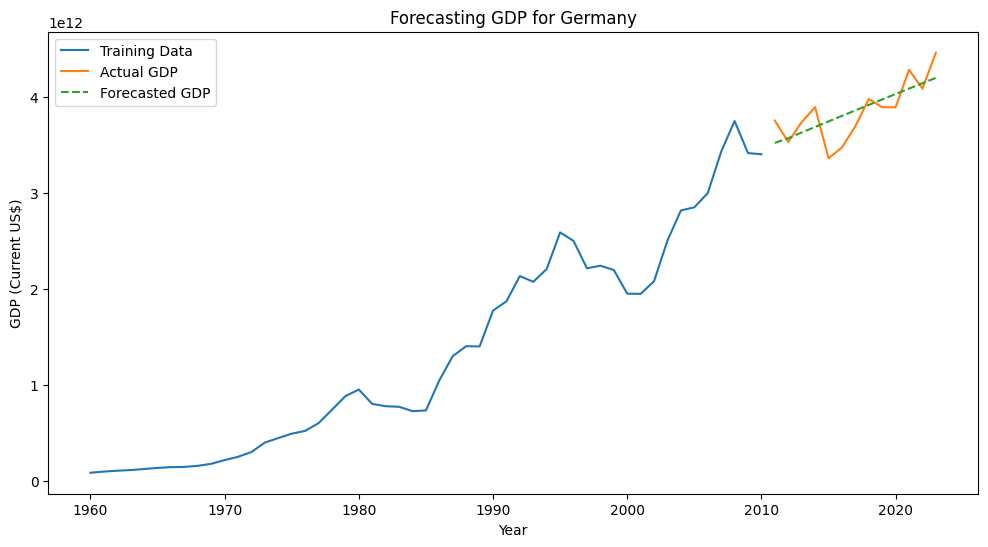

RMSE: 202052900220.29318


In [11]:
# Forcasting
# fitting with ARIMA model
# Select a single country for forecasting
country = 'Germany'
gdp_data = data[country].dropna()

# Split into train and test sets
train_size = int(len(gdp_data) * 0.8)
train, test = gdp_data[:train_size], gdp_data[train_size:]

# Fit ARIMA model
model = ARIMA(train, order=(2, 1, 2))  # Adjust order based on AIC or BIC
model_fit = model.fit()
print(model_fit.summary())

# Forecast
forecast = model_fit.forecast(steps=len(test))
plt.figure(figsize=(12, 6))
plt.plot(train, label="Training Data")
plt.plot(test, label="Actual GDP")
plt.plot(test.index, forecast, label="Forecasted GDP", linestyle='--')
plt.title(f"Forecasting GDP for {country}")
plt.xlabel("Year")
plt.ylabel("GDP (Current US$)")
plt.legend()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"RMSE: {rmse}")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: An unsupported index was provided. As a result, forecasts cannot be generated. To use the model for forecasting, use one of the supported classes of index.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/holtwinters/model.py:918: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


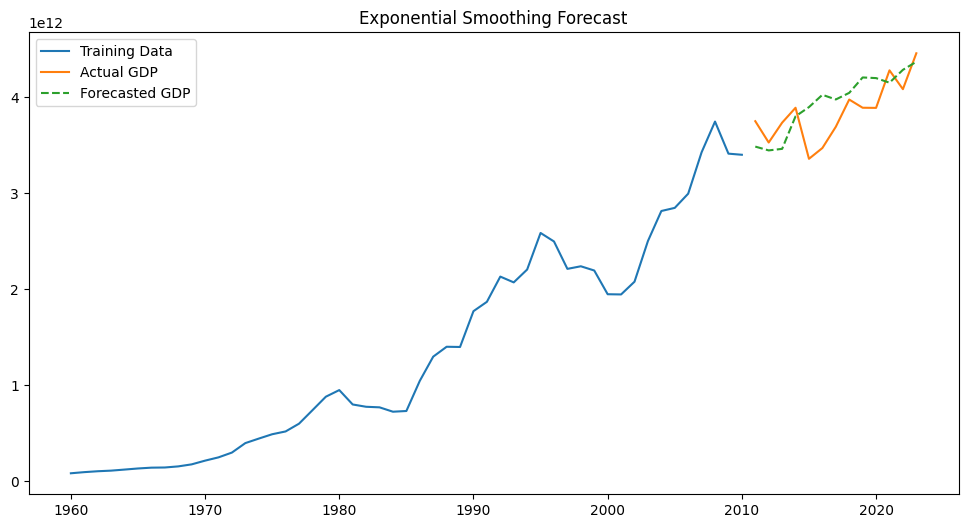

ETS RMSE: 291095344519.2895


In [12]:
# Exponential Smoothing (ETS)
# Exponential Smoothing models are good for capturing level, trend, and seasonality in the data.

from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit the model
ets_model = ExponentialSmoothing(train, seasonal='add', trend='add', seasonal_periods=12).fit()

# Forecast
forecast = ets_model.forecast(steps=len(test))

# Plot
plt.figure(figsize=(12, 6))
plt.plot(train, label='Training Data')
plt.plot(test, label='Actual GDP')
plt.plot(test.index, forecast, label='Forecasted GDP', linestyle='--')
plt.legend()
plt.title("Exponential Smoothing Forecast")
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, forecast))
print(f"ETS RMSE: {rmse}")


In [13]:
%pip install prophet


Note: you may need to restart the kernel to use updated packages.


13:10:15 - cmdstanpy - INFO - Chain [1] start processing
13:10:16 - cmdstanpy - INFO - Chain [1] done processing
/usr/local/lib/python3.10/dist-packages/prophet/forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


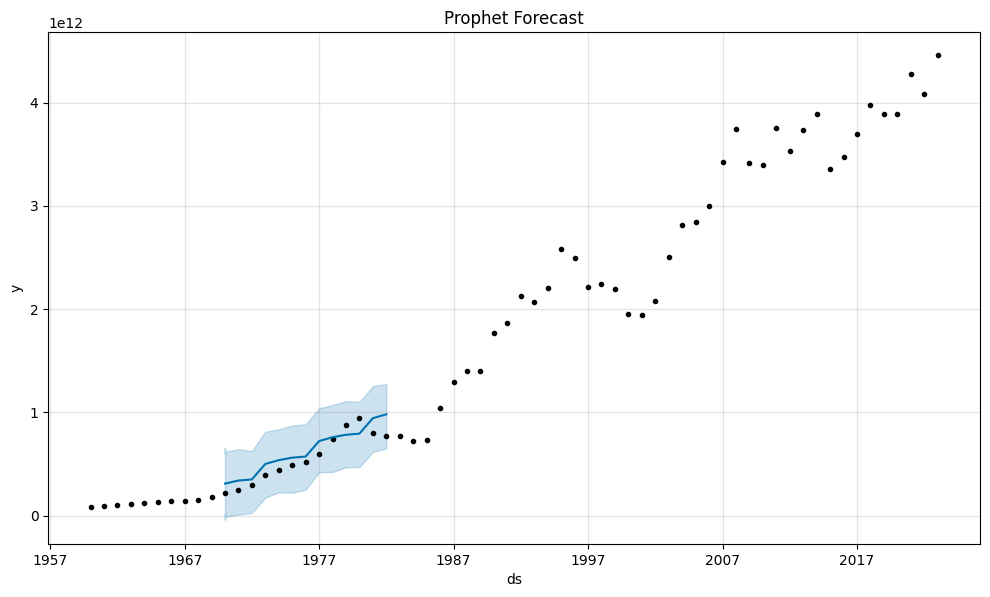

Prophet RMSE: 3223561895689.909


In [14]:
# Prophet
# Prophet is a robust time-series forecasting model designed for handling seasonality and holidays.

from prophet import Prophet

# Prepare data for Prophet
prophet_data = data['Germany'].reset_index()
prophet_data.columns = ['ds', 'y']  # Rename columns for Prophet

# Fit the model
prophet_model = Prophet()
prophet_model.fit(prophet_data)

# Make future predictions
future = prophet_model.make_future_dataframe(periods=12, freq='Y')
forecast = prophet_model.predict(future)

# Plot the forecast
prophet_model.plot(forecast)
plt.title("Prophet Forecast")
plt.show()

# Evaluate the model
actual = prophet_data['y'][-len(test):].values
predicted = forecast['yhat'][-len(test):].values
rmse = np.sqrt(mean_squared_error(actual, predicted))
print(f"Prophet RMSE: {rmse}")


In [15]:
%pip install tensorflow


Note: you may need to restart the kernel to use updated packages.


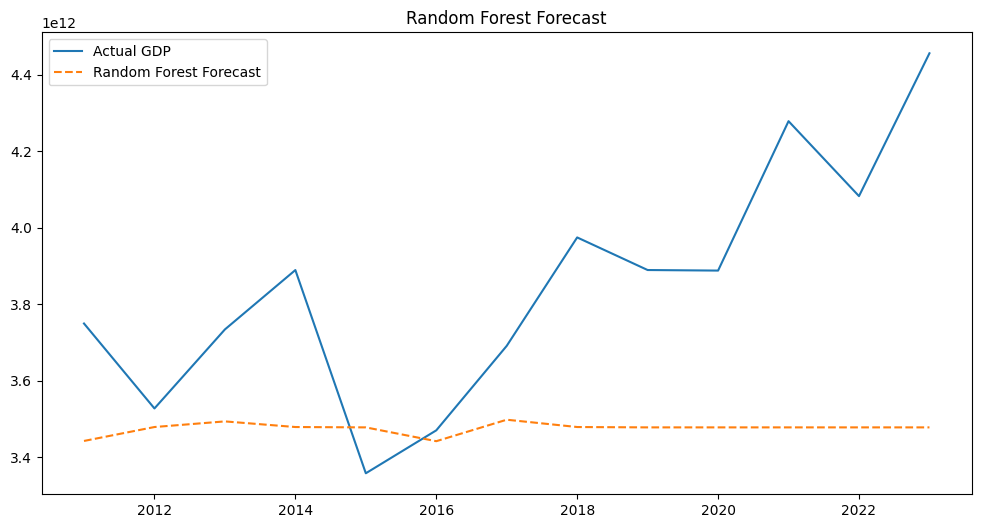

Random Forest RMSE: 474233914310.1981


In [16]:
# Random Forest Regressor
# A machine learning approach can also be applied for time-series forecasting.

from sklearn.ensemble import RandomForestRegressor

# Prepare data for Random Forest
time_lags = 5  # Use the last 5 years for prediction
X = np.array([gdp_data.values[i-time_lags:i] for i in range(time_lags, len(gdp_data))])
y = gdp_data.values[time_lags:]

X_train, X_test = X[:train_size - time_lags], X[train_size - time_lags:]
y_train, y_test = y[:train_size - time_lags], y[train_size - time_lags:]

# Fit Random Forest model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Forecast
rf_predictions = rf_model.predict(X_test)

# Plot
plt.figure(figsize=(12, 6))
plt.plot(test, label='Actual GDP')
plt.plot(test.index, rf_predictions, label='Random Forest Forecast', linestyle='--')
plt.legend()
plt.title("Random Forest Forecast")
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(test, rf_predictions))
print(f"Random Forest RMSE: {rmse}")


Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


2/2 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.1497
Epoch 2/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1251 
Epoch 3/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.1050 
Epoch 4/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0855 
Epoch 5/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0664 
Epoch 6/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0371 
Epoch 7/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0287 
Epoch 8/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.0191 
Epoch 9/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0201 
Epoch 10/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0245 
Epoch 11/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0286 
Epoch 12/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0250 
Epoch 13/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0215 
Epoch 14/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0153 
Epoch 15/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.0136 
Epoch 16/50
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/s

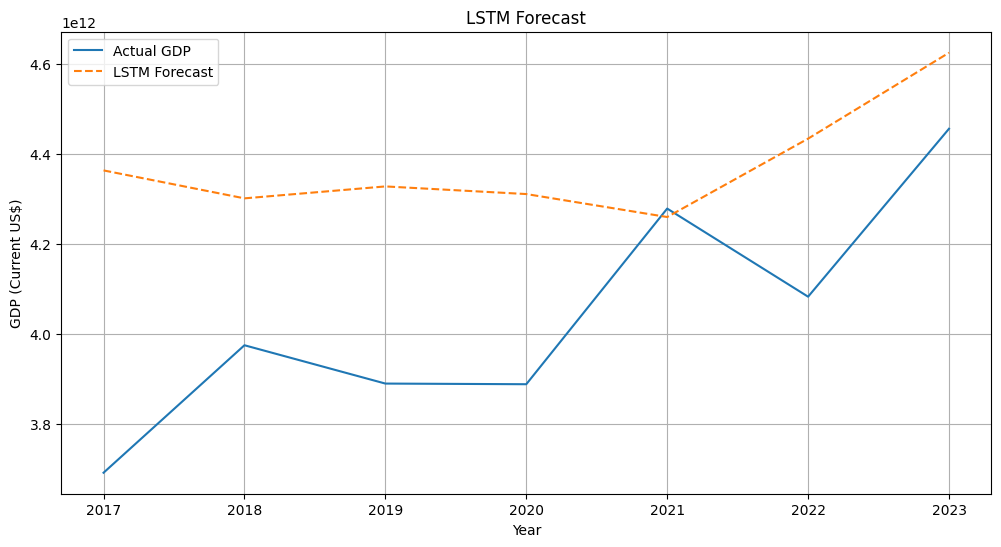

LSTM RMSE: 393355654203.6463


In [17]:
# Long Short-Term Memory (LSTM)
# LSTMs are deep learning models that are excellent for sequential data.

import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Prepare data for LSTM
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(gdp_data.values.reshape(-1, 1))

# Create training and testing data
def create_dataset(data, time_step=1):
    X, y = [], []
    for i in range(len(data) - time_step - 1):
        X.append(data[i:(i + time_step), 0])
        y.append(data[i + time_step, 0])
    return np.array(X), np.array(y)

time_step = 5  # Use the last 5 years for prediction
train_data = scaled_data[:train_size]
test_data = scaled_data[train_size:]

X_train, y_train = create_dataset(train_data, time_step)
X_test, y_test = create_dataset(test_data, time_step)

# Reshape for LSTM input
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, verbose=1)

# Forecast
lstm_predictions = model.predict(X_test)
lstm_predictions = scaler.inverse_transform(lstm_predictions)

# Adjust the test dataset to align with lstm_predictions
adjusted_test = test[time_step + 1:]
adjusted_test_index = adjusted_test.index

# Plot
plt.figure(figsize=(12, 6))
plt.plot(adjusted_test_index, adjusted_test, label='Actual GDP')
plt.plot(adjusted_test_index, lstm_predictions, label='LSTM Forecast', linestyle='--')
plt.legend()
plt.title("LSTM Forecast")
plt.xlabel("Year")
plt.ylabel("GDP (Current US$)")
plt.grid()
plt.show()

# Evaluate the model
rmse = np.sqrt(mean_squared_error(adjusted_test, lstm_predictions))
print(f"LSTM RMSE: {rmse}")
